#### Importing the Necessary Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import sklearn

##### Importing the data

In [4]:
df= pd.read_csv("C:\\Users\\ramam\\Downloads\\day.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [10]:
# Dropping the unneccessary columns like index column named 'instant'.
# Since we have month, year and day column separately we can drop 'dteday' column.
# Users of bike, we need only the count irrespective of who they are casual or registered. so dropping those two variables.

In [11]:
df.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Mapping the Season,Weekdays, Weather,Month to its respective meaning. 

In [14]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df.mnth=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df.weathersit=df.weathersit.map({1: 'Clear',2:'Mist',3:'Light_Snow_Rain',4:'Heavy_Rain'})

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# EDA

#### To Check the Outliers

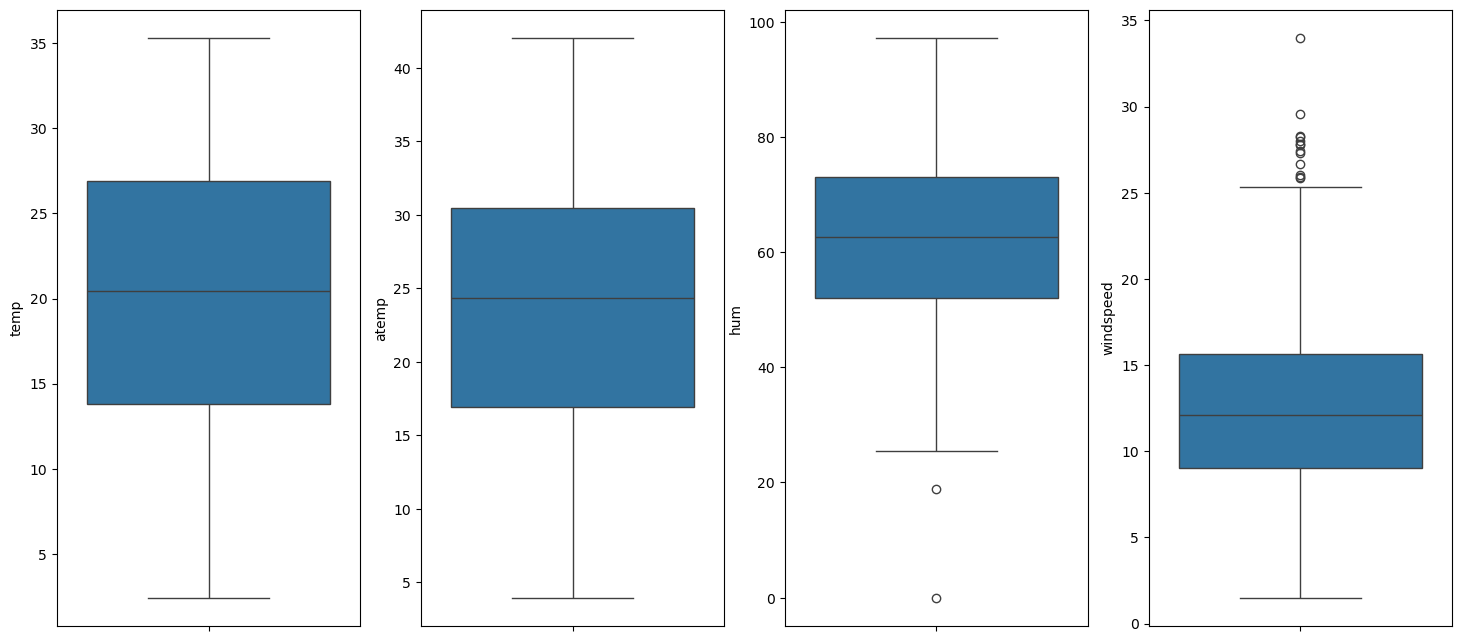

In [21]:
# Box Plots for Independant Variables.
col=['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,8))
i=1
for colmns in col:
    plt.subplot(1,4,i)
    sns.boxplot(y=colmns,data=df)
    i+=1
    

In [22]:
# From the above box plots, there are no outliers to be handled.

In [23]:
# Analyzing the Categorical Variables
cat_col=['season','yr','mnth','holiday','weekday','workingday','weathersit']

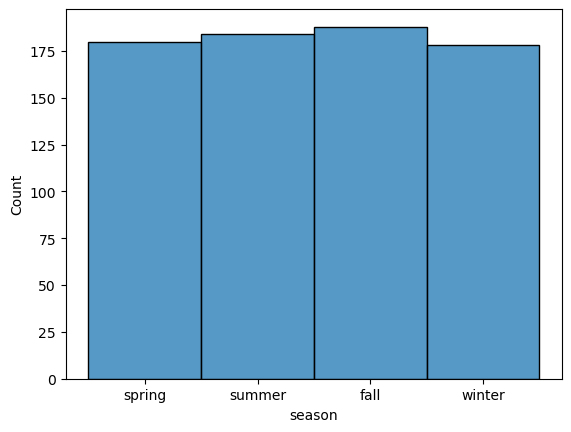

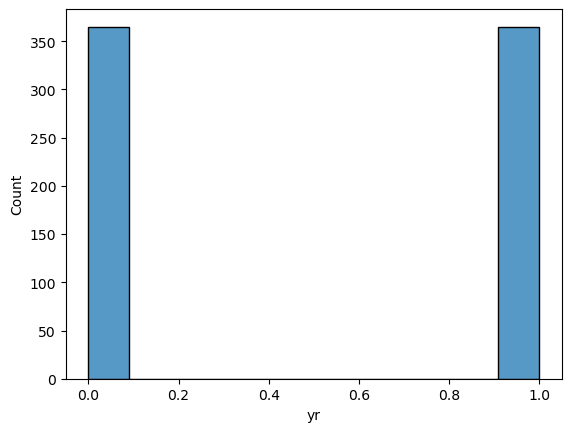

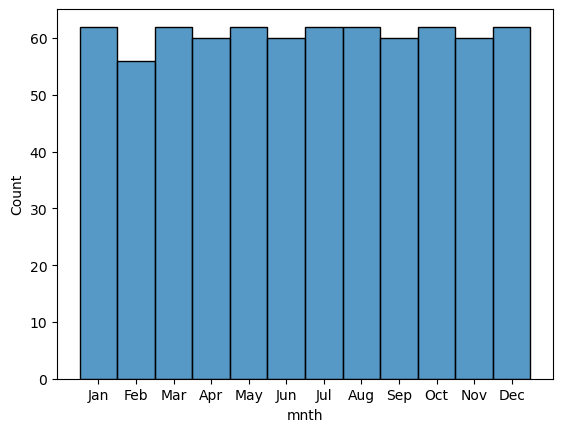

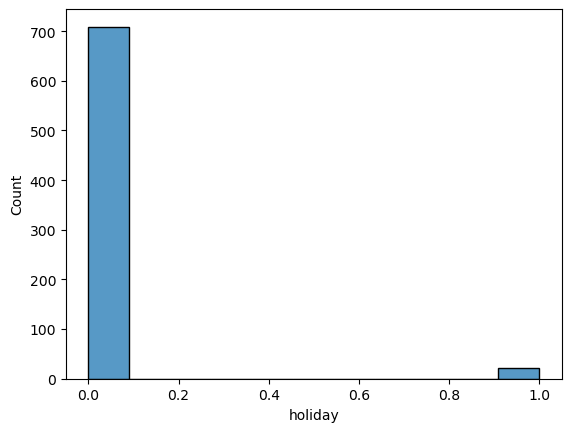

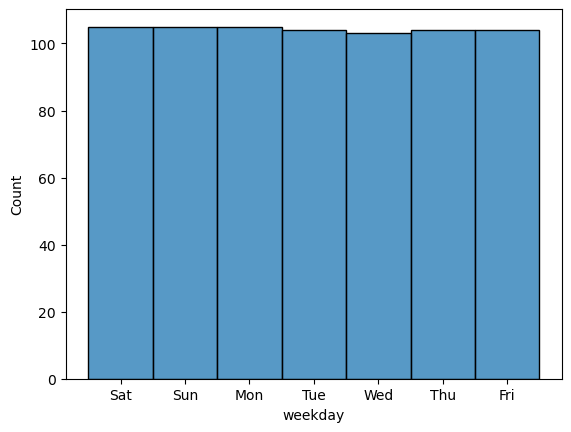

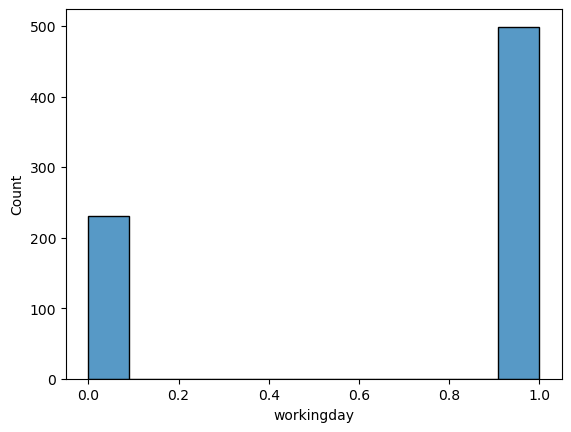

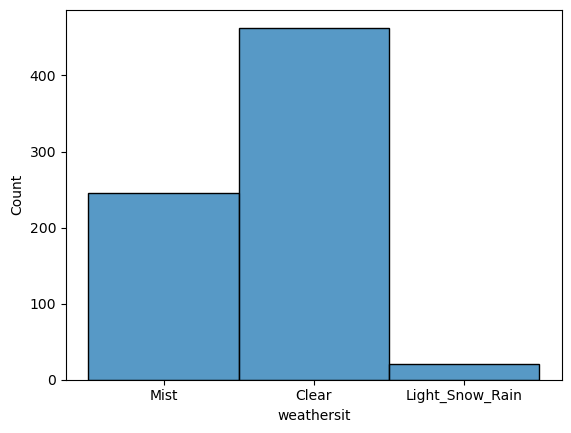

In [24]:
for col in cat_col: 
    sns.histplot(x=df[col]) 
    plt.show()

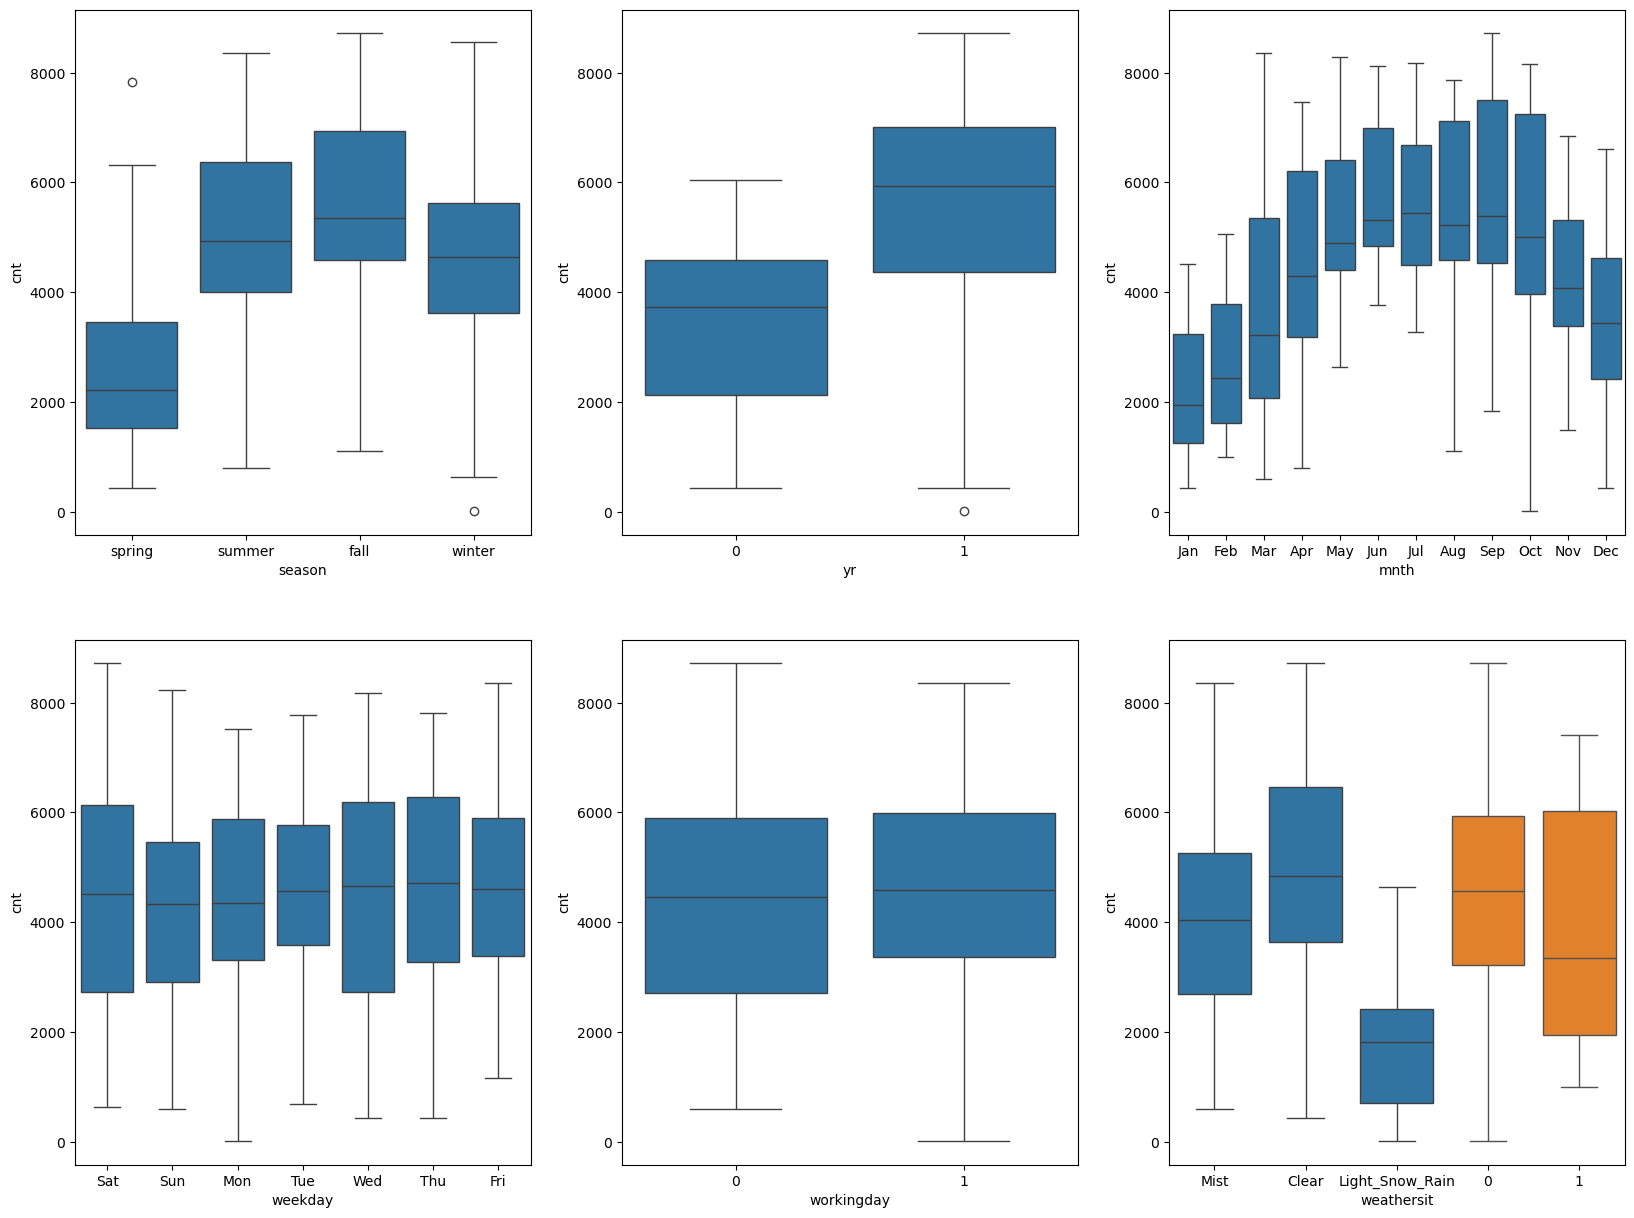

In [25]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.show()

#### To check the Linear Relationship, we can use pairplots for the variables.

<Figure size 2000x1300 with 0 Axes>

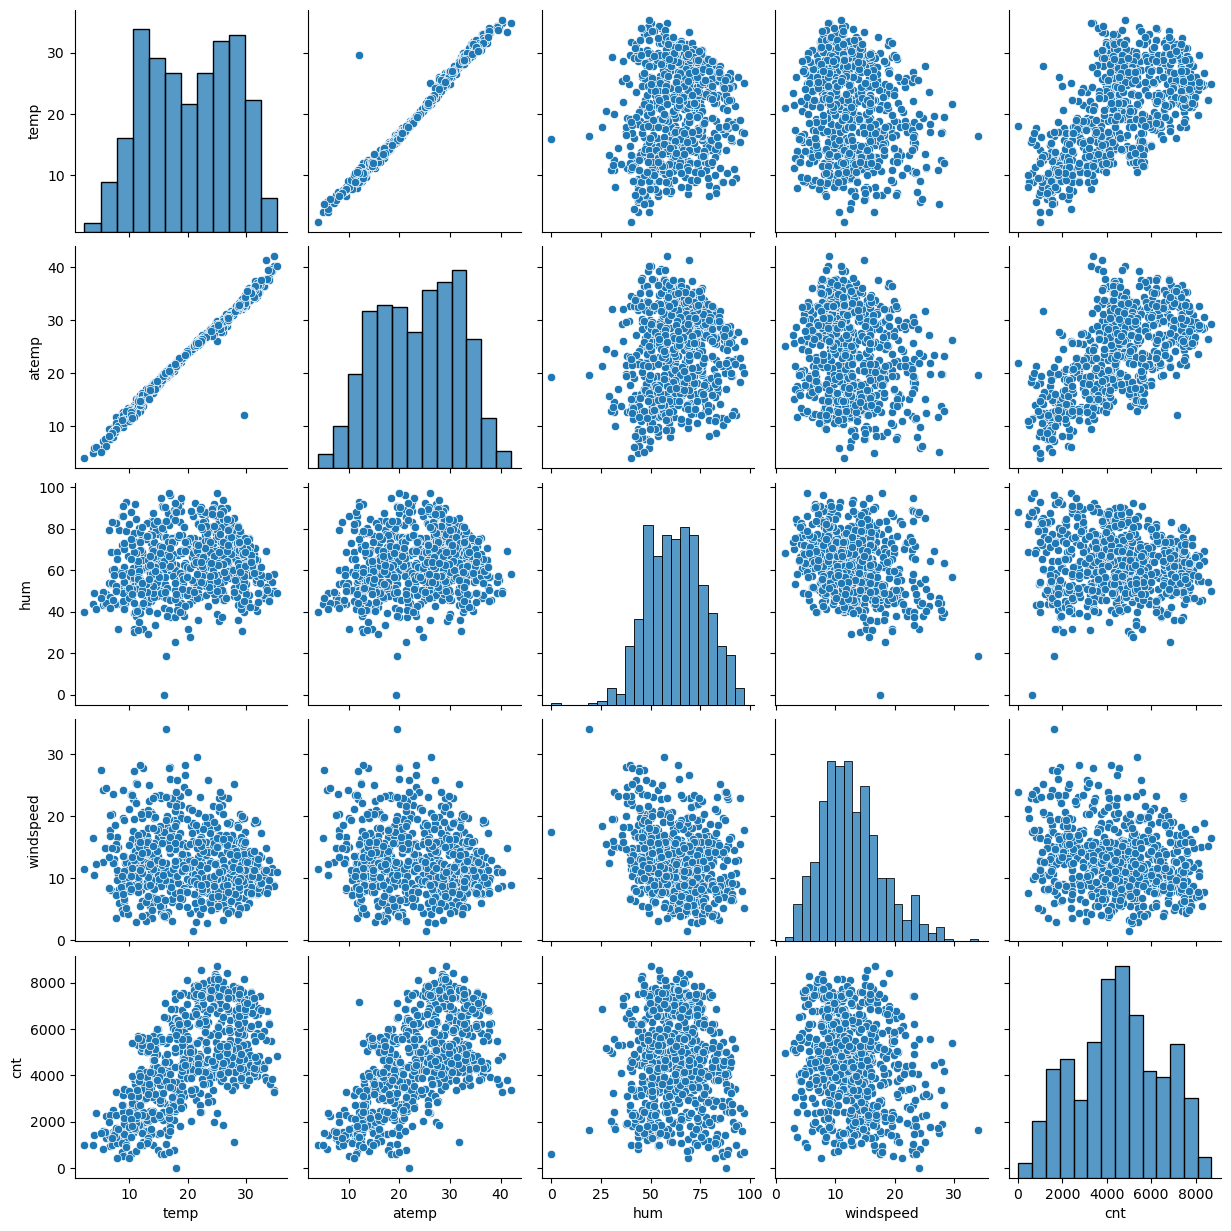

In [27]:
plt.figure(figsize=(20,13))
sns.pairplot(data=df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

##### From the above plots, we can see temp and atemp are highly correlated.
##### temp and atemp has good correlation with cnt.

In [29]:
# Pairplots for all the variables in the dataframe

<Figure size 2000x1300 with 0 Axes>

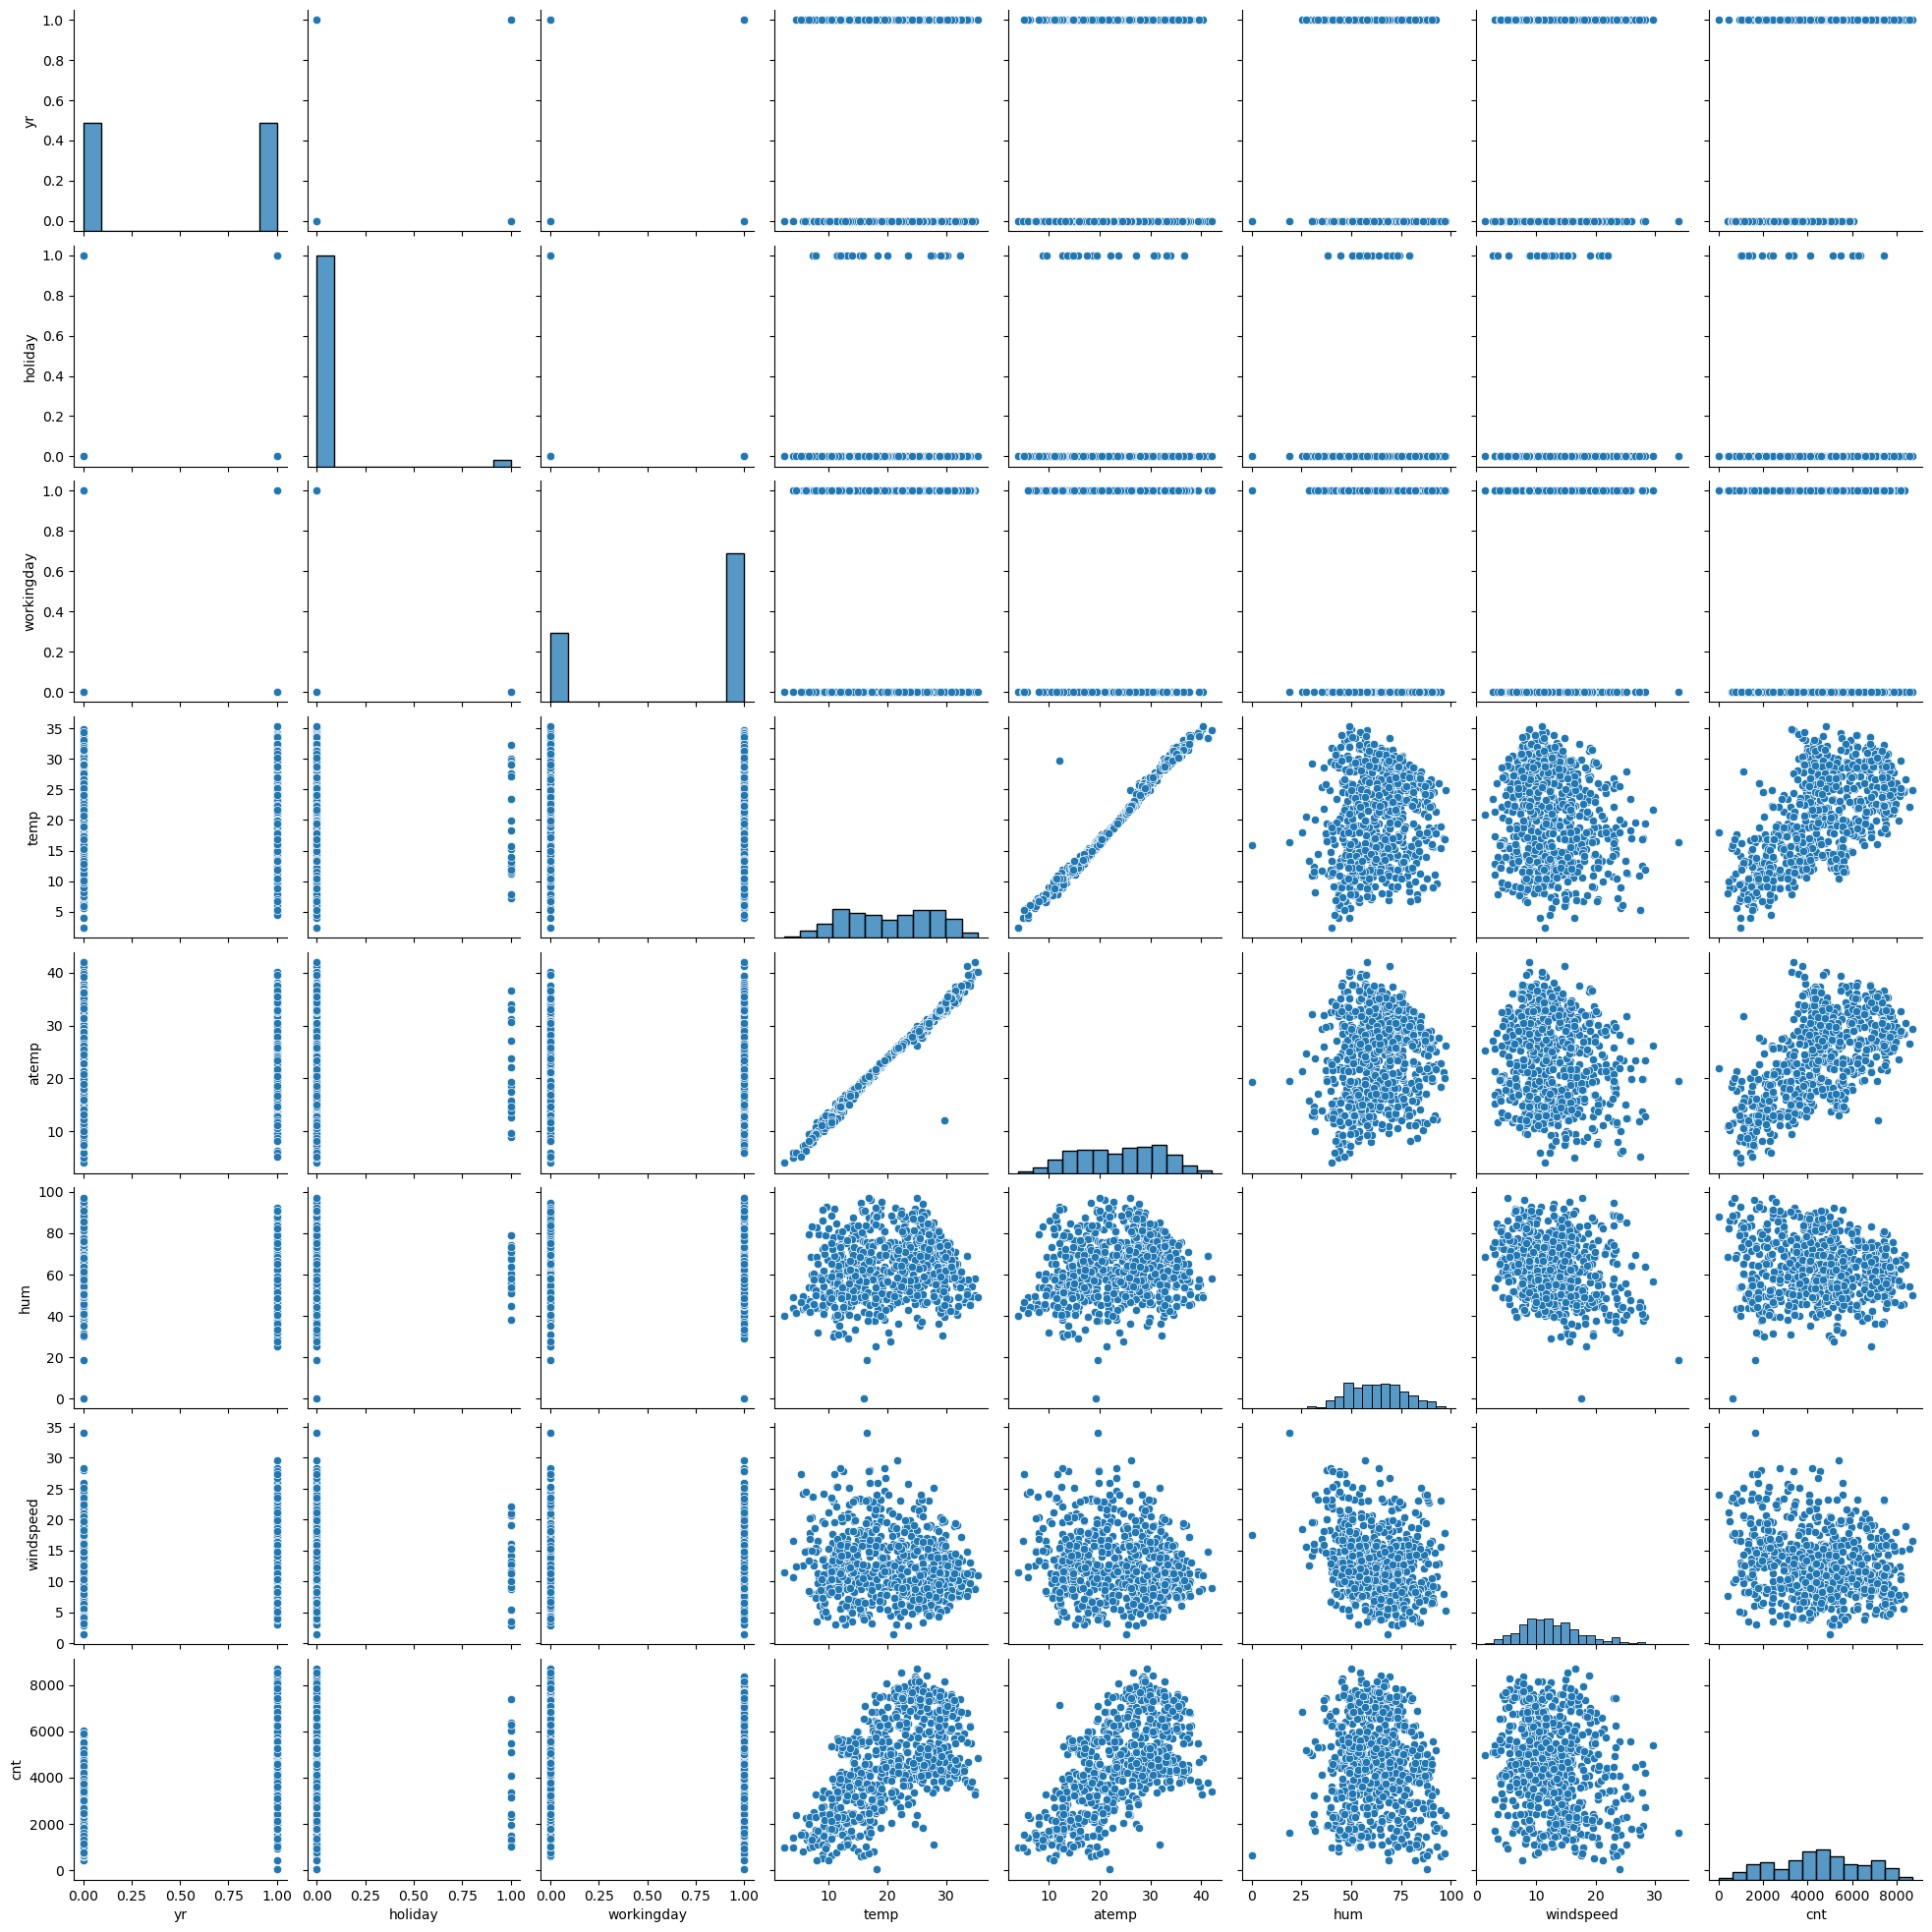

In [30]:
plt.figure(figsize=(20,13))
sns.pairplot(data=df)
plt.show()

In [31]:
# HeatMap for how much the continuous variables are correlated with each other.

<Axes: >

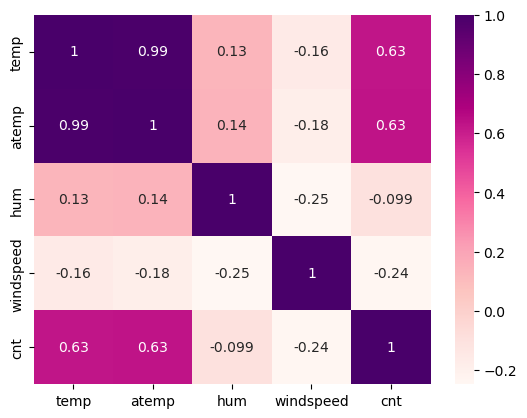

In [32]:
sns.heatmap(data=df[['temp','atemp','hum','windspeed','cnt']].corr(),cmap='RdPu',annot=True)

### We can see for temp and atemp there is 0.99 which is highly correlated with each other.

In [34]:
# Since temp and atemp are highly correlated, we can drop atemp
df.drop('atemp',axis=1,inplace=True)

### Data Preparation

In [36]:
df_Cat=df.select_dtypes(include=['object'])

### Dummy Variables.

In [38]:
df_dummies=pd.get_dummies(df_Cat,drop_first=True,dtype=int)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
#Drop categorical variables columns
df = df.drop(list (df_Cat.columns), axis=1)

In [40]:
#Concatenate dummy variables with Original Dataframe
df = pd.concat([df,df_dummies],axis=1)

In [41]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building

In [43]:
# Importing major libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [44]:
#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [45]:
# Let us scale continuous variables
num_vars = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [46]:
print(X_train.shape)
print(X_test.shape)

(511, 28)
(219, 28)


In [47]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.650333,0.320844,0.242661,0.246575,0.248532,0.095890,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.145741,0.169639,0.429112,0.431440,0.432585,0.294729,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.538858,0.199179,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.653499,0.298098,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754401,0.414438,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=10) 
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 12),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 14),
 ('weekday_Wed', False, 17),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist', False, 3)]

## Manual Elimination

In [51]:
import statsmodels.api as sm
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [53]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [54]:
# Features not selected by RFE
X_train.columns[~rfe.support_]


Index(['workingday', 'season_spring', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Mist'],
      dtype='object')

In [55]:
# Taking columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer','season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light_Snow_Rain']]

In [56]:
X_train_rfe.shape

(511, 10)

## Model-1

In [58]:
#Selected columns for Model 1 - all columns selected by RFE
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer','season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light_Snow_Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.11e-186
Time:                        15:47:52   Log-Likelihood:                -4140.4
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     500   BIC:                             8349.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Removing 'hum' as it has high negative coefficient and high VIF.

In [60]:
def build_model(cols1):
    X_train_sm = sm.add_constant(X_train[cols1])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr

In [61]:
def get_vif(cols1):
    df1 = X_train[cols1]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [62]:
cols1=['yr', 'holiday','temp', 'windspeed', 'season_summer','season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light_Snow_Rain']
build_model(cols1)
get_vif(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.47e-171
Time:                        15:47:52   Log-Likelihood:                -4179.4
No. Observations:                 511   AIC:                             8379.
Df Residuals:                     501   BIC:                             8421.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Removing 'mnth_Jul' as it has high negative coefficient and high VIF.


In [64]:
def build_model(cols2):
    X_train_sm = sm.add_constant(X_train[cols2])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr

In [65]:
def get_vif(cols2):
    df1 = X_train[cols2]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [66]:
cols2=['yr', 'holiday','temp', 'windspeed', 'season_summer','season_winter', 'mnth_Sep', 'weathersit_Light_Snow_Rain']
build_model(cols2)
get_vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.24e-172
Time:                        15:47:52   Log-Likelihood:                -4180.7
No. Observations:                 511   AIC:                             8379.
Df Residuals:                     502   BIC:                             8418.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.804 Hence we finalize this model to use further

In [68]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [69]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols2],y_train)
print(lr.intercept_,lr.coef_)

777.9379852239731 [ 2034.69694584  -757.51347562  4942.43923672 -1262.61802939
   704.61734192  1108.19224781   774.69395464 -2208.96932839]


##### Residual Analysis

In [71]:
y_train_pred = lr.predict(X_train[cols2])

In [72]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

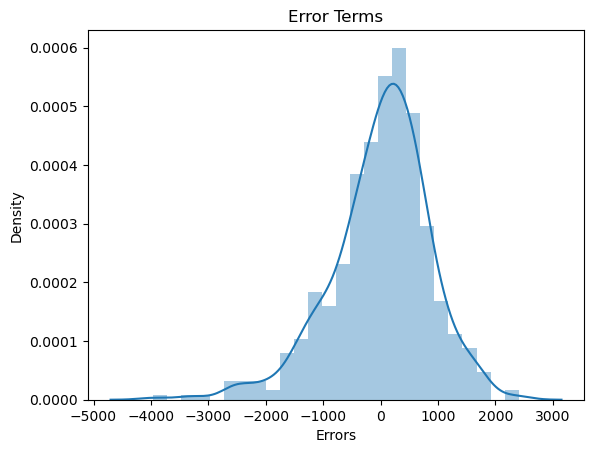

In [73]:
plot_res_dist(y_train, y_train_pred)

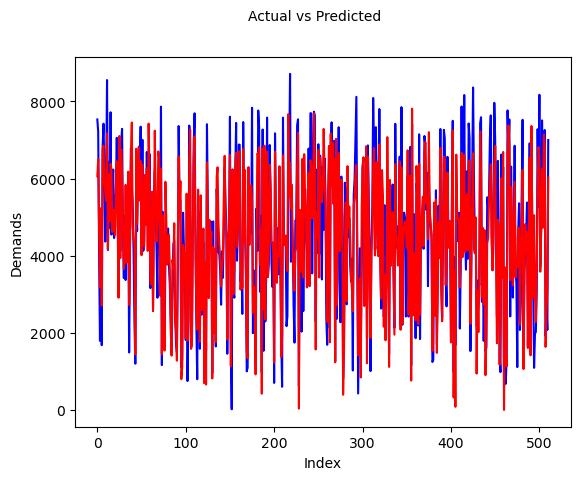

In [74]:
# Actual vs Predicted
a = [i for i in range(0,len(X_train),1)]
plt.plot(a,y_train, color="blue")
plt.plot(a,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 10)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

##### Model Predictions

In [76]:
#R-Squared value for train predictions
r2_score(y_train,y_train_pred)

0.8036118441406009

#### Prediction of values on test dataset

In [78]:
num_vars = ['temp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [79]:
cols2=['yr', 'holiday','temp', 'windspeed', 'season_summer','season_winter', 'mnth_Sep', 'weathersit_Light_Snow_Rain']

In [80]:
X_test1 = sm.add_constant(X_test)

In [81]:
y_test_pred = lr.predict(X_test1[cols2])

In [176]:
# Find out the R squared value between test and predicted test data sets.  
r2=r2_score(y_test,y_test_pred)
r2

0.7724261538142667

##### Model Evaluation

Text(0, 0.5, 'y_test_pred')

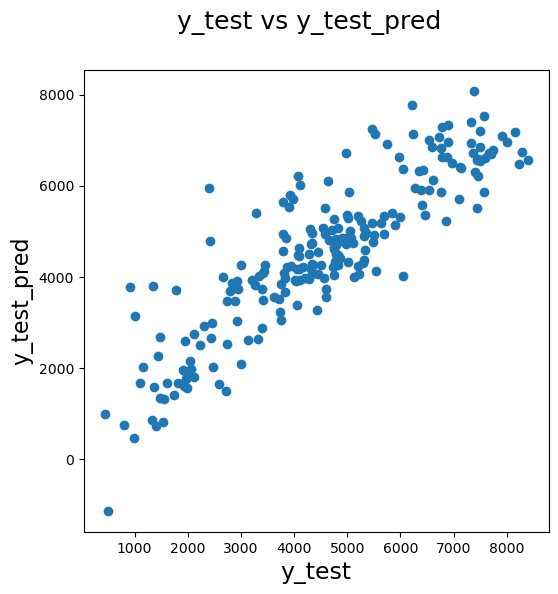

In [168]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 18) 
plt.xlabel('y_test', fontsize = 17)
plt.ylabel('y_test_pred', fontsize = 16) 

In [178]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7389


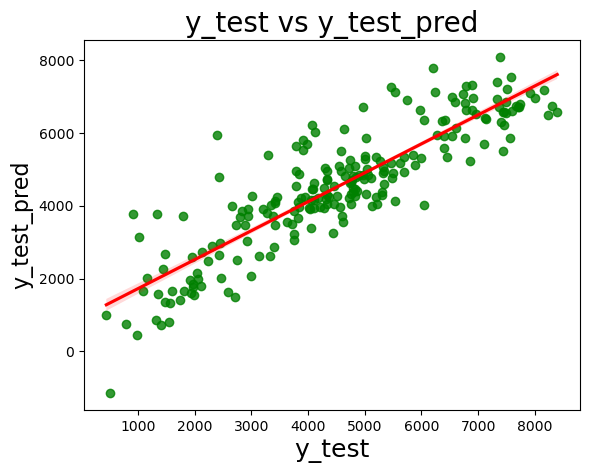

In [180]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### Conclusion

Significant variables to predict the demand for shared bikes
- Year
- Holiday
- temp
- windspeed
- season(summer,winter)
- month
- weathersit